# P300 Example

In this notebook, we will be using the SpikerTools library to analyze some P300 data from a session! Let's talk about the data first. This was recorded from one of Backyard Brains' devices using the Spike Recorder app. 

P300 Background:
The P300 signal arises when a subject is exposed to a series of two stimuli (they could be auditory, visual, somatosensory, etc.), such that one (standard stimulus) is more frequent than the other (target stimulus). The subject is told to focus on the target stimulus, and when this stimulus is presented, the P300 signal arises. This is also referred to as the oddball paradigm.

In this data file, when the more frequent/standard stimulus is presented, it is marked by "1" in the events file. The less frequent/ target stimulus is marked by "2".

The goal is to detect the P300 signal present when the target stimulus is presented. Let's get started!

First, we import spikertools. 

In [ ]:
#clone package repo
!git clone https://github.com/BackyardBrains/SpikerTools.git

%cd SpikerTools

!git pull origin master 


%pip install -r requirements.txt

#install package
#!python setup.py install

from SpikerTools import spikertools as sp

In [ ]:
#otherwise, use this
%pip install -r requirements.txt
import spikertools as sp

Next, we create a Session object using our data file! Just add the path to the filename in the Session() initializer as shown below. 

A Session object stores the data and associated events, and allows you to perform various preprocessing functions (filtering, downsamplling, etc.) and make various plots!

[1, 2]
[standard, oddball]


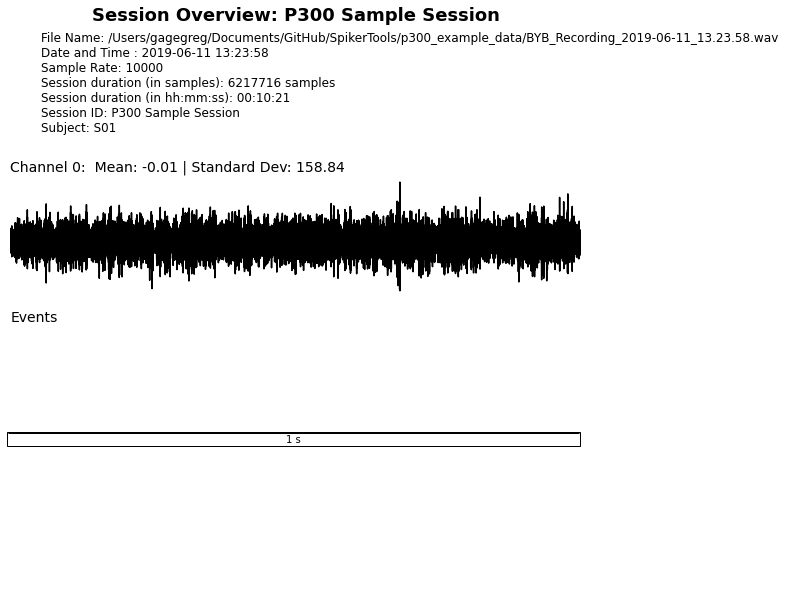

In [3]:
import importlib
import spikertools as sp
importlib.reload(sp)

#%cd ~/Documents/GitHub/SpikerTools/p300_example_data
p300 = sp.Session("/Users/gagegreg/Documents/GitHub/SpikerTools/p300_example_data/BYB_Recording_2019-06-11_13.23.58.wav")
print(p300.events)
#rename the events
p300.events["1"].name = "standard"
p300.events["2"].name = "oddball"
print(p300.events)
p300.events["standard"].color = "b"
p300.events["oddball"].color = "r"
p300.sessionID = "P300 Sample Session"
p300.subject = "S01"
p300.plot_overview()

In [27]:
e = sp.Event()

RecursionError: maximum recursion depth exceeded

In [15]:
import collections as c

class Events(list):
    def __init__(self):
         self.items = []

    def append(self, item):
         self.items.append (item)

    def __getitem__(self, item):
        if type(item) == str:
            print (type(item), item)
            for count, value in enumerate(self.items):
                if str(value) == item:
                    return (self.items[count])
            
class Event:
    def __init__(self, key = None):
        if isinstance(key, str):
            self._name = key
        else: 
            self._name = "event"
            print("Empty [Event] class created.")
        self._timestamps = []

    def __repr__(self):
        return self._name

    def __getitem__(self, items):
        print (type(items), items)
    
    @property
    def name(self):
        return self._name
    @name.setter
    def name(self, key):
        self._name = key
    
    @property
    def timestamps(self):
        return self._timestamps
    
e = Event()
e.name = "oddball"
e.timestamps.append(1.6)
e.timestamps.append(1.7)
e.timestamps.append(2.1)
e.timestamps.append(7.8)
print(e)
print(e.timestamps)

e2 = Event()
e2.name = "standard"
e2.timestamps.append(1.9)
e2.timestamps.append(1.8)
e2.timestamps.append(2.7)
e2.timestamps.append(7.9)

gg = Events()
gg.append(e)
gg.append(e2)

print(gg)
e3 = gg["oddball"]
print(e3.timestamps)

Empty [Event] class created.
oddball
[1.6, 1.7, 2.1, 7.8]
Empty [Event] class created.
[]
<class 'str'> oddball
[1.6, 1.7, 2.1, 7.8]


In [59]:
p300.events.eventNames
p300.events.rename()

['1', '2']

In [39]:
#print(type(p300.events))
print(p300.events.eventNames)

<bound method Events.eventNames of {'data': {}, '_Events__colors': {'standard': 'b', 'oddball': 'r'}, 'standard': [0.425, 2.21, 3.1035, 3.9702, 4.8702, 5.7702, 6.6465, 7.5465, 8.4465, 9.993, 10.893, 11.793, 12.6889, 14.4617, 15.2533, 16.1533, 17.0533, 17.9533, 18.8533, 20.4958, 21.3907, 22.2833, 23.1833, 24.0728, 24.9728, 25.8389, 26.6645, 27.5645, 28.4645, 28.9738, 29.8596, 30.7596, 31.6596, 33.4596, 34.3596, 35.2596, 36.1596, 37.0596, 37.9596, 38.8596, 39.7596, 40.6596, 41.5509, 42.3782, 43.2407, 44.1162, 45.0162, 45.864, 47.6207, 48.5207, 49.3197, 49.9047, 50.5734, 52.0863, 52.9775, 53.835, 56.5223, 57.4223, 58.3223, 59.2132, 60.1132, 61.0027, 61.9027, 62.8027, 63.7027, 64.6027, 65.5027, 66.4027, 67.3027, 68.2027, 69.1027, 70.0027, 70.8904, 71.7904, 72.6904, 73.5352, 74.4252, 75.3252, 76.1813, 77.0813, 77.9813, 78.8813, 79.7813, 80.6813, 81.5813, 82.4813, 83.3813, 84.2813, 85.1813, 86.0803, 86.9803, 87.8757, 89.5626, 90.4626, 91.3626, 92.2626, 93.1626, 94.0456, 95.7486, 96.5794, 97.

Uneven Row
Uneven Row
Uneven Row
Uneven Row
Uneven Row
Uneven Row


<Figure size 432x288 with 0 Axes>

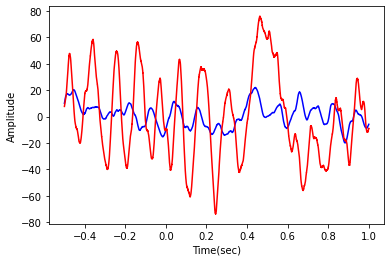

In [24]:
p300.plot_eta(["standard", "oddball"], timewindow=(-0.5,1))

First, let's take a look at our data. What does it look like in general? How long is the session? How are the events distributed? These questions can be answered by plotting an overview of the Session using the plot_overview function.

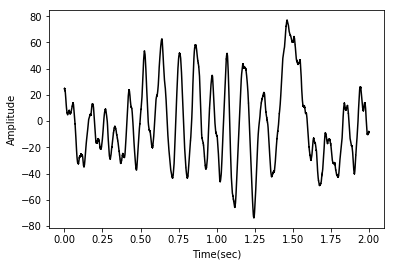

In [36]:
p300.plot_elavg("oddball", (-1,1))

We can also plot a small interval of the data to see what it looks like with finer detail! The plot_interval function takes two required arguments: the first one is the channel index (here, we care about Channel 0). The second is a tuple with the time bounds. Here, I am plotting between 5 and 7 seconds, so I use (5,7).

In [ ]:
p300.plot_interval(0,(5,7))

Now, to detect the P300 signal, we need to average over the different instances of the target stimulus presentation. This can be easily done with the event-locked average plotting function (plot_elavg). Just specify the event you want to average over (in our case, that would be "2" since this is the target stimulus) and the time window you would like to take around this event (here, I chose from 0 to 1 second after the event since the P300 signal appears 300 ms after stimulus presentation)

In [ ]:
p300.plot_elavg("2", (0,1))

What a peak! Let's see how this compares with the standard stimulus presentation. Repeat the same code, just replace "2" with "1" to denote the standard stimulus. 

In [ ]:
p300.plot_elavg("1", (0,1))

We also see a peak here. Hmmm, that's strange. But wait, look at the amplitude! Clearly the amplitude for the target stimulus is higher than that of the standard stimulus. Let's visualize this by plotting both on the same graph. 

We call the first function as normal, except this time, we add show=False to the parameters. We want to add more to the figure before we show it!

Next, call the second function. Here, you set show=True (It is already like this by default, I'm just showing it here for clarity), but make to set a new parameter makefig = False. When it is set to False, it prevents a new figure from forming, which is what we are looking for! We do not want a new figure, we want to plot on top of the previous one.
And Voila!

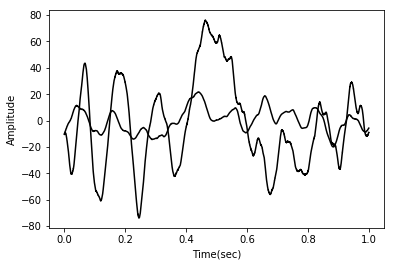

In [42]:
p300.plot_elavg("standard", (0,1), show=False)
p300.plot_elavg("oddball", (0,1), show=True, makefig=False)


Here, we can clearly see the peaks of the P300 signal with the target stimulus exceeding the peaks of the standard stimulus. Yay! We did it. 

# Alpha Waves Example

In this notebook, we will be using the SpikerTools library to analyze some alpha wave data from a session! Let's talk about the data first. This was recorded from one of Backyard Brains' devices using the Spike Recorder app. 

Alpha Waves Background:
Alpha waves arise in the brain when the subject is in a calm, resting state. Their frequency range is between 8 and 13 Hz, usually at 10 Hz. One way to record them is to place electrodes over the visual cortex (the occipital lobe towards the back of the subject's head), and have the subject close their eyes. The uniform visual stimulus induced by this action ellicits synchronous activity over the visual cortex, resulting in alpha waves!

In this data file, when the subject closes their eyes, it is marked by "Closed" in the events file. When the subject's eyes are opened, it is marked by "Open".

The goal is to detect the alpha waves present when the subject's eyes are closed. Let's get started!

First, we create a Session object using the path of the data file as shown below.

A Session object stores the data and associated events, and allows you to perform various preprocessing functions (filtering, downsamplling, etc.) and make various plots!

In [ ]:
aw = sp.Session(r"alphawave_example_data\BYB_Recording_2015-07-26_21.47.25.wav")

First, let's take a look at our data. What does it look like in general? How long is the session? How are the events distributed? These questions can be answered by plotting an overview of the Session using the plot_overview function.

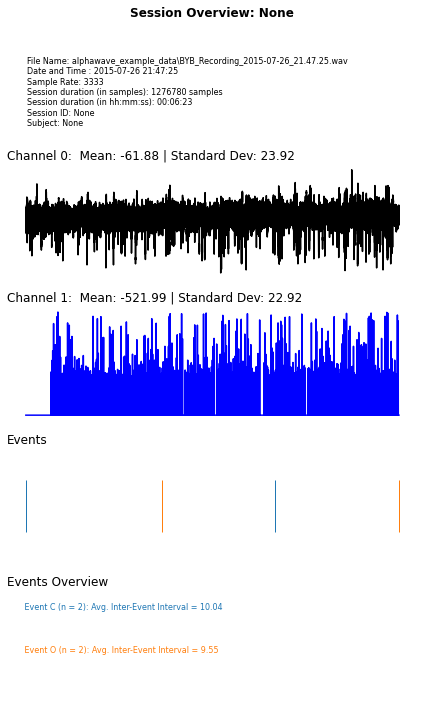

In [ ]:
aw.plot_overview()

Let's plot an interval of the data to see if we can detect the alpha waves. The plot_interval function takes two required arguments: the first one is the channel index (here, we care about Channel 0). The second is a tuple with the time bounds. Here, I am plotting between 7 and 8 seconds, so I use (7,8).

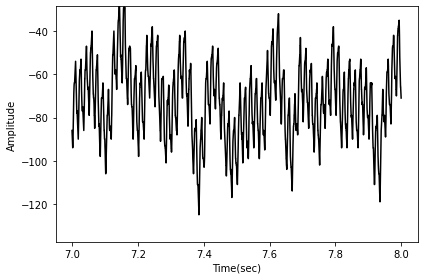

In [ ]:
aw.plot_interval(0,(7,8))


They're present! But there's a lot of high frequency noise. We can get rid of that by filtering our data using the filter function. The filtering function takes a few required arguments: 
The cutoff frequency (the frequency at which we would like to filter, here it is 20 since the data we are looking for is below 20 Hz)
The filter type, this can be lowpass ("lp") to reduce high frequencies, or high pass ("hp") to reduce low frequencies. Since I want to remove the high frequency noise, I use a low pass filter!
The channel index. Here I am filtering Channel 0.

In [ ]:
aw._filt(20,"lp", channel_index=0)

After filtering, let's plot that same interval again.

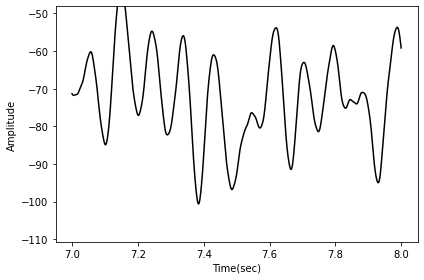

In [ ]:
aw.plot_interval(0,(7,8))

Now our data looks much cleaner! Next, let us try and visualize the frequency using some of our frequency plotting functions!

The first one is the power spectral density plot (PSD for short). It shows you the relative power of each frequency in a signal. We would expect to see a peak around 10 Hz for alpha waves!

The plot-psd function takes two required arguments:
- the channel index (in our case, it's 0)
- the time bound that we would like to analyze (here, I want to analyze between 5 and 10 seconds since this is when the subject's eyes are closed)


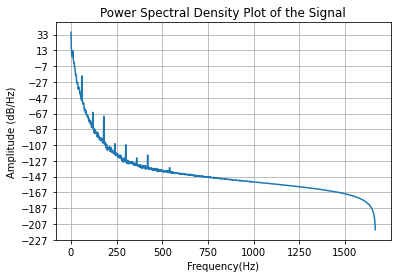

In [ ]:
aw.plot_psd(0,(5,10))

Clearly, we would like to see the plot around 10 Hz. Luckily, the plot_psd function has some optional parameters that can improve the view!

These include:
freq_bounds which allows you to set the bounds of the frequency (let's set this to be between 5 and 20 Hz)
amp_bounds which allows you to set the bounds of the amplitude (let's set this to be between -5 and 20 dB/Hz)
and freq_res which allows you to set the frequency resolution (by default it is 1, let's set it to 0.5 for a better resolution)

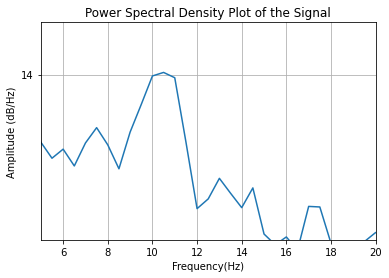

In [ ]:
aw.plot_psd(0,(5,10), freq_bounds=(5,20), amp_bounds=(-5,20), freq_res=0.5)

We can see an obvious peak at 10 Hz! Now let's compare this to when the subject has their eyes open. 

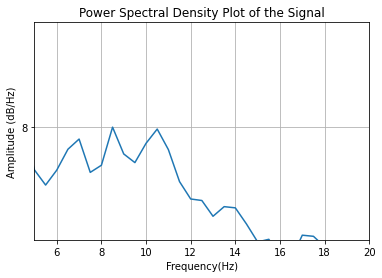

In [ ]:
aw.plot_psd(0,(12,17), freq_bounds=(5,20), amp_bounds=(-5,20), freq_res=0.5)

Here the peak is almost insignificant (around 8dB/Hz compared to the previous 14dB/hz)

Another function we can plot is the spectrogram. This generates a heat map representing the amplitude of a frequency versus time. The plotting function takes similar parameters to the psd plotting function. 

We can clearly see two streaks of yellow corresponding to high amplitude at 10 Hz, around the time the subject closes their eyes!

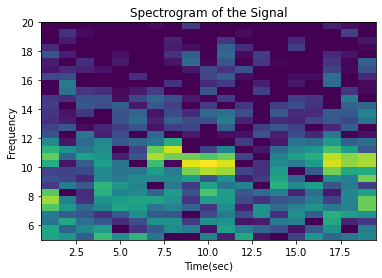

In [ ]:
aw.plot_spectrogram(0,bounds=(0,20), freq_bounds=(5,20), amp_bounds=(-5,20), freq_res=0.5)

# SSVEP Example

In this notebook, we will be using the SpikerTools library to analyze some SSVEP data from a session! Let's talk about the data first. This was recorded from one of Backyard Brains' devices using the Spike Recorder app. 

The SSVEP is a brain signal that arises when the retina is excited with a visual stimulus that flickers at a certain frequency f, usually ranging between 3.5 Hz and 75 Hz. The SSVEP has a frequency equal to f and/or multiples of f in this case. 

The goal is to detect the SSVEP in the EEG signal by analyzing the frequency distribution!

Let us initialize the session by adding the datapath.

In [ ]:
ssvep = sp.Session("ssvep_example_data\BYB_Recording_2021-06-30_15.19.59.wav")

More about the data: the subject is looking at stimuli flashing at certain frequencies: 
Event 1:  looking at 4.3 Hz
Event 2:  looking at 4.5 Hz
Event 3:  looking at 5 Hz
Event 4:  looking at 6 Hz
Event 5:  looking at 6.6 Hz
Event 6:  looking at 7.5 Hz
Event 7:  looking at 9.5 Hz

Event 8 corresponds to eyes closed
Event 0 corresponds to eyes open, but looking away from the stimulus



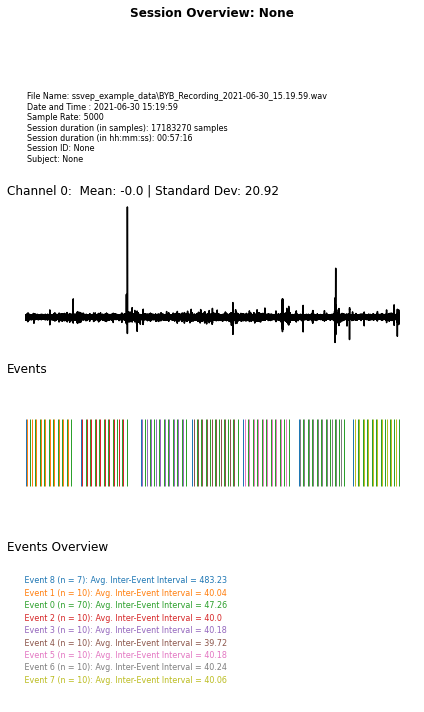

In [ ]:
ssvep.plot_overview()

Now let's examine the frequency content of the EEG signal for each flashing stimulis frequency! First, we would like to determine the general distribution over the whole trial for each frequency. To do so, we will look at the exact event times, and take the first and last time stamps as our bounds (this is a rough estimate) for computing the power spectral density.

The power spectral density or psd plot shows us the contribution of each frequency to the total power of the signal.

Event 1: 4.3 Hz

In [ ]:
print(ssvep.get_events()["1"])

[23.687, 63.458, 103.3768, 143.6416, 183.5858, 224.4956, 264.5338, 304.4792, 344.2524, 384.067]


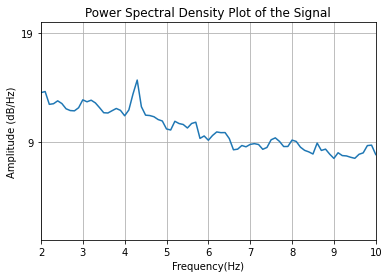

In [ ]:
ssvep.plot_psd(0, (23,384), (2,10), freq_res=0.1, amp_bounds= (0,20))

Event 2: 4.5 Hz

In [ ]:
print(ssvep.get_events()["2"])

[513.0484, 551.4152, 591.7074, 631.7216, 671.6526, 713.275, 752.065, 792.5294, 833.095, 873.0204]


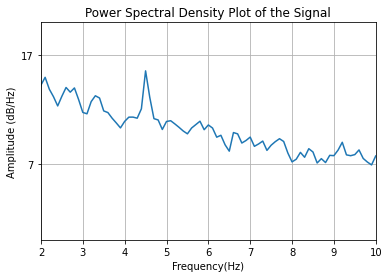

In [ ]:
ssvep.plot_psd(0, (513,817), (2,10), freq_res=0.1, amp_bounds= (0,20))

Event 3: 5 Hz

In [ ]:
print(ssvep.get_events()["3"])

[1039.6796, 1079.5548, 1119.788, 1160.2238, 1200.2658, 1240.2028, 1280.6524, 1320.5294, 1361.432, 1401.2796]


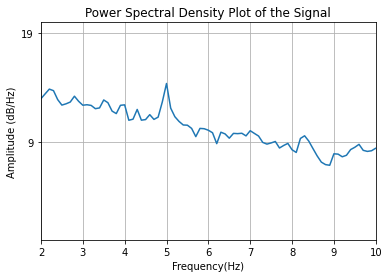

In [ ]:
ssvep.plot_psd(0, (1039,1401), (2,10), freq_res=0.1, amp_bounds= (0,20))

Event 4: 6 Hz

In [ ]:
print(ssvep.get_events()["4"])

[1498.2034, 1535.1948, 1574.7996, 1615.445, 1654.9782, 1694.7336, 1735.537, 1775.3224, 1815.8008, 1855.6952]


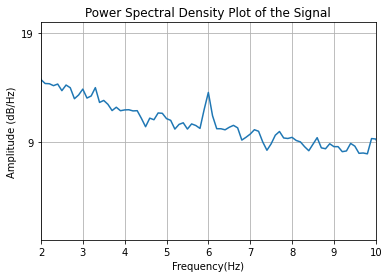

In [ ]:
ssvep.plot_psd(0, (1498,1855), (2,10), freq_res=0.1, amp_bounds= (0,20))

Event 5: 6.6 Hz

In [ ]:
print(ssvep.get_events()["5"])

[1948.4162, 1988.3418, 2028.544, 2069.9726, 2108.7878, 2149.0456, 2189.4136, 2229.6654, 2269.6416, 2310.0282]


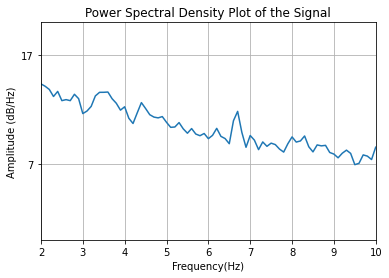

In [ ]:
ssvep.plot_psd(0, (1948,2310), (2,10), freq_res=0.1, amp_bounds= (0,20))

Event 6: 7.5 Hz

In [ ]:
print(ssvep.get_events()["6"])

[2435.9494, 2476.1022, 2515.9486, 2557.3396, 2595.921, 2636.8018, 2677.792, 2717.2612, 2756.6862, 2798.1338]


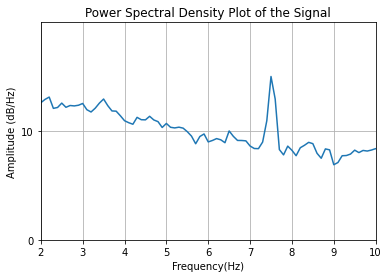

In [ ]:
ssvep.plot_psd(0, (2435,2798), (2,10), freq_res=0.1, amp_bounds= (0,20))

Event 7: 9.5 Hz

In [ ]:
print(ssvep.get_events()["7"])

[2923.446, 2963.6058, 3002.5236, 3042.4918, 3083.2646, 3122.8596, 3163.1486, 3204.1268, 3243.9346, 3283.9856]


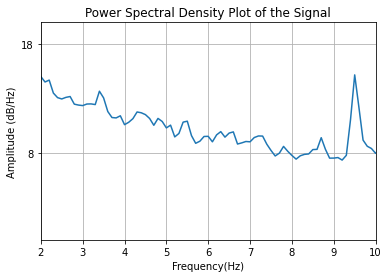

In [ ]:
ssvep.plot_psd(0, (2923,3283), (2,10), freq_res=0.1, amp_bounds= (0,20))

As we can see, the stimulus frequencies pair up well with the peaks in the psd! Some are stronger than others. 
Next, let us look at a specific trial (the 7.5 Hz trial for instance), and plot the spectrogram.

In [ ]:
print(ssvep.get_events()["6"])

[2435.9494, 2476.1022, 2515.9486, 2557.3396, 2595.921, 2636.8018, 2677.792, 2717.2612, 2756.6862, 2798.1338]


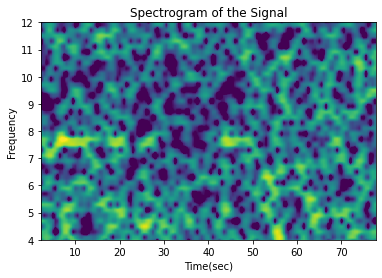

In [ ]:
ssvep.plot_spectrogram(0, freq_res =0.2, bounds=(2435,2515), freq_bounds=(4,12), amp_bounds=(0,20))

We can see an increase in the amplitude for 7.5 Hz right about when the subject is looking at the stimulus!